<a href="https://colab.research.google.com/github/ericycheng8/AI4CCEE_Fall_2024/blob/main/mini_project/MiniProject_1/Submission/Yi_(Eric)_Cheng_Mini_Project_1_Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Use OpenStreetMap to identify multilane arterial roads in Iowa.

In [ ]:
# Install OSMnx library and Folium
!pip install osmnx folium

# Import libraries
import osmnx as ox
import networkx as nx
import folium

# Define a larger area (e.g., the state of Iowa) to encompass more data
area = "Iowa, USA"

# Download the road network for Iowa, keeping only 'primary' and 'secondary' roads to reduce memory usage
# Note: Depending on system resources, consider downloading a smaller subset or simplify the graph to manage memory better
G = ox.graph_from_place(area, network_type='drive', custom_filter='["highway"~"primary|secondary"]')

# Define a function to filter multilane arterial roads
def filter_multilane_roads(G):
    multilane_roads = []
    for u, v, k, data in G.edges(keys=True, data=True):
        lanes = data.get('lanes', 1)  # Default to 1 if 'lanes' tag is missing
        if isinstance(lanes, list):
            lanes = lanes[0] if lanes and isinstance(lanes[0], (int, str)) else 1
        elif isinstance(lanes, str):
            try:
                lanes = int(lanes)
            except ValueError:
                lanes = 1

        if int(lanes) > 2:
            multilane_roads.append((u, v, k))
    return G.edge_subgraph(multilane_roads)

# Filter the road network to only include multilane roads
multilane_G = filter_multilane_roads(G)

# Convert the graph to a GeoDataFrame
gdf_edges = ox.graph_to_gdfs(multilane_G, nodes=False)

# Get the center of the area for the map
center = gdf_edges.unary_union.centroid

# Create a folium map centered around Iowa
m = folium.Map(location=[center.y, center.x], zoom_start=7, tiles='cartodbpositron')

# Add the multilane roads to the map
for _, row in gdf_edges.iterrows():
    coords = [(y, x) for x, y in row['geometry'].coords]
    folium.PolyLine(coords, color='red', weight=3, opacity=0.8).add_to(m)

# Save the map to an HTML file
m.save("multilane_roads_iowa.html")

# Display the map in the notebook (optional, depending on your environment)
m

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.1
    Uninstalling networkx-3.4.1:
      Successfully uninstalled networkx-3.4.1
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 63 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.1
    Uninstalling networkx-3.4.1:
      Successfully uninstalled networkx-3.4.1
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 63 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


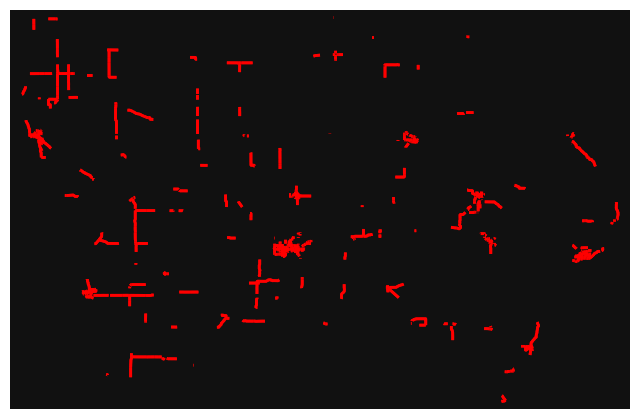

In [ ]:
# Install OSMnx library
!pip install osmnx

# Import libraries
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define a larger area (e.g., the state of Iowa) to encompass more data
area = "Iowa, USA"

# Download the road network for Iowa, keeping only 'primary' and 'secondary' roads to reduce memory usage
# Note: Depending on system resources, consider downloading a smaller subset or simplify the graph to manage memory better
G = ox.graph_from_place(area, network_type='drive', custom_filter='["highway"~"primary|secondary"]')

# Define a function to filter multilane arterial roads
def filter_multilane_roads(G):
    multilane_roads = []
    for u, v, k, data in G.edges(keys=True, data=True):
        lanes = data.get('lanes', 1)  # Default to 1 if 'lanes' tag is missing
        if isinstance(lanes, list):
            lanes = lanes[0] if lanes and isinstance(lanes[0], (int, str)) else 1
        elif isinstance(lanes, str):
            try:
                lanes = int(lanes)
            except ValueError:
                lanes = 1

        if int(lanes) > 2:
            multilane_roads.append((u, v, k))
    return G.edge_subgraph(multilane_roads)

# Filter the road network to only include multilane roads
multilane_G = filter_multilane_roads(G)

# Plot the filtered multilane arterial roads
fig, ax = ox.plot_graph(multilane_G, node_size=0, edge_linewidth=2, edge_color='r')

# Save the multilane arterial roads as a GeoPackage file
ox.save_graph_geopackage(multilane_G, filepath="multilane_roads_iowa.gpkg")

In [ ]:
import geopandas as gpd

# Load the GeoPackage file (replace 'your_file.gpkg' with the actual file path)
gdf = gpd.read_file('/content/multilane_roads_iowa.gpkg')

# Optionally, display the first few rows to understand the data structure
print(gdf.head())

# If you want to export the geometry (latitude and longitude) to CSV,
# convert the geometry column into separate latitude and longitude columns
gdf['longitude'] = gdf.geometry.x
gdf['latitude'] = gdf.geometry.y

# Drop the geometry column if not needed in the CSV
gdf = gdf.drop(columns='geometry')

# Export to a CSV file
gdf.to_csv('Multilane_Roads_Iowa.csv', index=False)

# Optionally, display the first few rows of the resulting CSV file to verify
print(gdf.head())

         osmid          y          x  street_count highway  \
0    159588352  40.814607 -91.134541             2           
1    160391169  42.034727 -91.702198             3           
2   2551533569  41.971004 -91.669563             3           
3  11643207683  41.517339 -94.012532             3           
4    160624642  42.983030 -95.623951             3           

                     geometry  
0  POINT (-91.13454 40.81461)  
1  POINT (-91.70220 42.03473)  
2  POINT (-91.66956 41.97100)  
3  POINT (-94.01253 41.51734)  
4  POINT (-95.62395 42.98303)  
         osmid          y          x  street_count highway  longitude  \
0    159588352  40.814607 -91.134541             2         -91.134541   
1    160391169  42.034727 -91.702198             3         -91.702198   
2   2551533569  41.971004 -91.669563             3         -91.669563   
3  11643207683  41.517339 -94.012532             3         -94.012532   
4    160624642  42.983030 -95.623951             3         -95.623951 

2. Extract crash data from FARS database, focusing on pedestrian fatalities

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file (replace 'uploaded_file.csv' with the actual file path after uploading to Colab)
file_path = '/content/Accident 2015.csv'
df = pd.read_csv(file_path)

# Filter the desired columns
columns_to_keep = ["STATENAME", "ST_CASE", "HOUR", "HOURNAME", "MINUTE", "ROUTENAME", "LATITUDE", "LONGITUD", "HARM_EVNAME", "LGT_CONDNAME", "FATALS"]
filtered_df = df[columns_to_keep]

# Filter rows where 'HARM_EVNAME' contains 'Pedestrian'
pedestrian_df = filtered_df[filtered_df['HARM_EVNAME'].str.contains("Pedestrian", na=False)]

# Further filter rows where 'STATENAME' is 'Iowa'
iowa_filtered_df = pedestrian_df[pedestrian_df['STATENAME'] == 'Iowa']

# Save the filtered DataFrame to a CSV file
output_file_path = 'Iowa_Accident_Pedestrians_2015.csv'
iowa_filtered_df.to_csv(output_file_path, index=False)

# Display the first few rows of the filtered data
print(iowa_filtered_df.head()) # Changed from Iowa_Accident_Pedestrians_2015 to iowa_filtered_df

# Display a link to download the CSV file
from google.colab import files
files.download(output_file_path)  # This will prompt a download for the CSV file

      STATENAME  ST_CASE  HOUR         HOURNAME  MINUTE  \
12185      Iowa   190027     2    2:00am-2:59am       4   
12193      Iowa   190035    21    9:00pm-9:59pm      41   
12230      Iowa   190072    10  10:00am-10:59am      30   
12231      Iowa   190073    22  10:00pm-10:59pm       4   
12279      Iowa   190121     5    5:00am-5:59am       9   

                         ROUTENAME   LATITUDE   LONGITUD HARM_EVNAME  \
12185  Local Street - Municipality  41.600358 -93.622619  Pedestrian   
12193  Local Street - Municipality  41.527514 -90.622178  Pedestrian   
12230                 U.S. Highway  42.491994 -90.665094  Pedestrian   
12231                 U.S. Highway  42.449017 -93.643822  Pedestrian   
12279                  County Road  41.468756 -91.829261  Pedestrian   

             LGT_CONDNAME  FATALS  
12185      Dark - Lighted       1  
12193  Dark - Not Lighted       1  
12230            Daylight       1  
12231  Dark - Not Lighted       1  
12279  Dark - Not Lighted       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file (replace 'uploaded_file.csv' with the actual file path after uploading to Colab)
file_path = '/content/Accident 2016.csv'
df = pd.read_csv(file_path)

# Filter the desired columns
columns_to_keep = ["STATENAME", "ST_CASE", "HOUR", "HOURNAME", "MINUTE", "ROUTENAME", "LATITUDE", "LONGITUD", "HARM_EVNAME", "LGT_CONDNAME", "FATALS"]
filtered_df = df[columns_to_keep]

# Filter rows where 'HARM_EVNAME' contains 'Pedestrian'
pedestrian_df = filtered_df[filtered_df['HARM_EVNAME'].str.contains("Pedestrian", na=False)]

# Further filter rows where 'STATENAME' is 'Iowa'
iowa_filtered_df = pedestrian_df[pedestrian_df['STATENAME'] == 'Iowa']

# Save the filtered DataFrame to a CSV file
output_file_path = 'Iowa_Accident_Pedestrians_2016.csv'
iowa_filtered_df.to_csv(output_file_path, index=False)

# Display the first few rows of the filtered data
print(iowa_filtered_df.head()) # Changed from Iowa_Accident_Pedestrians_2015 to iowa_filtered_df

# Display a link to download the CSV file
from google.colab import files
files.download(output_file_path)  # This will prompt a download for the CSV file

      STATENAME  ST_CASE  HOUR         HOURNAME  MINUTE  \
13431      Iowa   190007    17    5:00pm-5:59pm      36   
13447      Iowa   190023    18    6:00pm-6:59pm      53   
13464      Iowa   190040     2    2:00am-2:59am      18   
13488      Iowa   190064    20    8:00pm-8:59pm       1   
13500      Iowa   190076    11  11:00am-11:59am      59   

                         ROUTENAME   LATITUDE   LONGITUD HARM_EVNAME  \
13431                  County Road  41.285281 -92.665100  Pedestrian   
13447  Local Street - Municipality  41.583172 -93.803858  Pedestrian   
13464                   Interstate  41.259769 -95.921264  Pedestrian   
13488  Local Street - Municipality  41.532828 -93.625731  Pedestrian   
13500                   Interstate  41.599597 -93.588006  Pedestrian   

             LGT_CONDNAME  FATALS  
13431  Dark - Not Lighted       1  
13447      Dark - Lighted       1  
13464      Dark - Lighted       1  
13488      Dark - Lighted       1  
13500            Daylight       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file (replace 'uploaded_file.csv' with the actual file path after uploading to Colab)
file_path = '/content/Accident 2017.csv'
df = pd.read_csv(file_path)

# Filter the desired columns
columns_to_keep = ["STATENAME", "ST_CASE", "HOUR", "HOURNAME", "MINUTE", "ROUTENAME", "LATITUDE", "LONGITUD", "HARM_EVNAME", "LGT_CONDNAME", "FATALS"]
filtered_df = df[columns_to_keep]

# Filter rows where 'HARM_EVNAME' contains 'Pedestrian'
pedestrian_df = filtered_df[filtered_df['HARM_EVNAME'].str.contains("Pedestrian", na=False)]

# Further filter rows where 'STATENAME' is 'Iowa'
iowa_filtered_df = pedestrian_df[pedestrian_df['STATENAME'] == 'Iowa']

# Save the filtered DataFrame to a CSV file
output_file_path = 'Iowa_Accident_Pedestrians_2017.csv'
iowa_filtered_df.to_csv(output_file_path, index=False)

# Display the first few rows of the filtered data
print(iowa_filtered_df.head()) # Changed from Iowa_Accident_Pedestrians_2015 to iowa_filtered_df

# Display a link to download the CSV file
from google.colab import files
files.download(output_file_path)  # This will prompt a download for the CSV file

      STATENAME  ST_CASE  HOUR         HOURNAME  MINUTE  \
13453      Iowa   190018    13    1:00pm-1:59pm      40   
13455      Iowa   190020    19    7:00pm-7:59pm       4   
13467      Iowa   190033    23  11:00pm-11:59pm      39   
13480      Iowa   190046    19    7:00pm-7:59pm      50   
13490      Iowa   190056    20    8:00pm-8:59pm      37   

                         ROUTENAME   LATITUDE   LONGITUD HARM_EVNAME  \
13453  Local Street - Municipality  42.421214 -94.988208  Pedestrian   
13455                 U.S. Highway  41.006464 -91.974528  Pedestrian   
13467                 U.S. Highway  42.440761 -90.859078  Pedestrian   
13480                 U.S. Highway  41.999711 -92.673256  Pedestrian   
13490                State Highway  41.647458 -91.544006  Pedestrian   

             LGT_CONDNAME  FATALS  
13453            Daylight       1  
13455  Dark - Not Lighted       1  
13467  Dark - Not Lighted       1  
13480  Dark - Not Lighted       1  
13490      Dark - Lighted       

<ipython-input-15-752cabead52a>:6: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file (replace 'uploaded_file.csv' with the actual file path after uploading to Colab)
file_path = '/content/Accident 2018.csv'
df = pd.read_csv(file_path)

# Filter the desired columns
columns_to_keep = ["STATENAME", "ST_CASE", "HOUR", "HOURNAME", "MINUTE", "ROUTENAME", "LATITUDE", "LONGITUD", "HARM_EVNAME", "LGT_CONDNAME", "FATALS"]
filtered_df = df[columns_to_keep]

# Filter rows where 'HARM_EVNAME' contains 'Pedestrian'
pedestrian_df = filtered_df[filtered_df['HARM_EVNAME'].str.contains("Pedestrian", na=False)]

# Further filter rows where 'STATENAME' is 'Iowa'
iowa_filtered_df = pedestrian_df[pedestrian_df['STATENAME'] == 'Iowa']

# Save the filtered DataFrame to a CSV file
output_file_path = 'Iowa_Accident_Pedestrians_2018.csv'
iowa_filtered_df.to_csv(output_file_path, index=False)

# Display the first few rows of the filtered data
print(iowa_filtered_df.head()) # Changed from Iowa_Accident_Pedestrians_2015 to iowa_filtered_df

# Display a link to download the CSV file
from google.colab import files
files.download(output_file_path)  # This will prompt a download for the CSV file

      STATENAME  ST_CASE  HOUR         HOURNAME  MINUTE  \
13230      Iowa   190033    21    9:00pm-9:59pm       2   
13236      Iowa   190039    23  11:00pm-11:59pm      40   
13247      Iowa   190050     5    5:00am-5:59am      22   
13252      Iowa   190055    23  11:00pm-11:59pm       1   
13277      Iowa   190081     2    2:00am-2:59am      50   

                         ROUTENAME   LATITUDE   LONGITUD HARM_EVNAME  \
13230  Local Street - Municipality  41.624994 -93.655953  Pedestrian   
13236  Local Street - Municipality  41.946372 -91.676533  Pedestrian   
13247                 U.S. Highway  41.681608 -91.630944  Pedestrian   
13252                 U.S. Highway  42.725631 -94.226811  Pedestrian   
13277                 U.S. Highway  41.457778 -91.020278  Pedestrian   

             LGT_CONDNAME  FATALS  
13230      Dark - Lighted       1  
13236      Dark - Lighted       1  
13247  Dark - Not Lighted       1  
13252      Dark - Lighted       1  
13277  Dark - Not Lighted       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file, specifying the encoding as 'latin-1' or 'ISO-8859-1'
file_path = '/content/Accident 2019.csv'
df = pd.read_csv(file_path, encoding='latin-1') # or encoding='ISO-8859-1'

# Filter the desired columns
columns_to_keep = ["STATENAME", "ST_CASE", "HOUR", "HOURNAME", "MINUTE", "ROUTENAME", "LATITUDE", "LONGITUD", "HARM_EVNAME", "LGT_CONDNAME", "FATALS"]
filtered_df = df[columns_to_keep]

# Filter rows where 'HARM_EVNAME' contains 'Pedestrian'
pedestrian_df = filtered_df[filtered_df['HARM_EVNAME'].str.contains("Pedestrian", na=False)]

# Further filter rows where 'STATENAME' is 'Iowa'
iowa_filtered_df = pedestrian_df[pedestrian_df['STATENAME'] == 'Iowa']

# Save the filtered DataFrame to a CSV file
output_file_path = 'Iowa_Accident_Pedestrians_2019.csv'
iowa_filtered_df.to_csv(output_file_path, index=False)

# Display the first few rows of the filtered data
print(iowa_filtered_df.head()) # Changed from Iowa_Accident_Pedestrians_2015 to iowa_filtered_df

# Display a link to download the CSV file
from google.colab import files
files.download(output_file_path)  # This will prompt a download for the CSV file

      STATENAME  ST_CASE  HOUR         HOURNAME  MINUTE  \
13006      Iowa   190036     4    4:00am-4:59am      15   
13026      Iowa   190057     9    9:00am-9:59am      50   
13028      Iowa   190059    11  11:00am-11:59am      38   
13035      Iowa   190067    12  12:00pm-12:59pm       5   
13043      Iowa   190075     2    2:00am-2:59am      58   

                         ROUTENAME   LATITUDE   LONGITUD HARM_EVNAME  \
13006  Local Street - Municipality  42.497886 -92.320814  Pedestrian   
13026                   Interstate  41.657217 -93.540167  Pedestrian   
13028  Local Street - Municipality  42.498619 -90.697481  Pedestrian   
13035                   Interstate  41.649789 -93.575539  Pedestrian   
13043                   Interstate  41.599678 -90.599611  Pedestrian   

             LGT_CONDNAME  FATALS  
13006  Dark - Not Lighted       1  
13026            Daylight       1  
13028            Daylight       1  
13035            Daylight       1  
13043  Dark - Not Lighted       

<ipython-input-21-38a31296aea1>:6: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1') # or encoding='ISO-8859-1'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file, specifying the encoding as 'latin-1' or 'ISO-8859-1'
file_path = '/content/Accident 2020.csv'
df = pd.read_csv(file_path, encoding='latin-1') # or encoding='ISO-8859-1'

# Filter the desired columns
columns_to_keep = ["STATENAME", "ST_CASE", "HOUR", "HOURNAME", "MINUTE", "ROUTENAME", "LATITUDE", "LONGITUD", "HARM_EVNAME", "LGT_CONDNAME", "FATALS"]
filtered_df = df[columns_to_keep]

# Filter rows where 'HARM_EVNAME' contains 'Pedestrian'
pedestrian_df = filtered_df[filtered_df['HARM_EVNAME'].str.contains("Pedestrian", na=False)]

# Further filter rows where 'STATENAME' is 'Iowa'
iowa_filtered_df = pedestrian_df[pedestrian_df['STATENAME'] == 'Iowa']

# Save the filtered DataFrame to a CSV file
output_file_path = 'Iowa_Accident_Pedestrians_2020.csv'
iowa_filtered_df.to_csv(output_file_path, index=False)

# Display the first few rows of the filtered data
print(iowa_filtered_df.head()) # Changed from Iowa_Accident_Pedestrians_2015 to iowa_filtered_df

# Display a link to download the CSV file
from google.colab import files
files.download(output_file_path)  # This will prompt a download for the CSV file

      STATENAME  ST_CASE  HOUR         HOURNAME  MINUTE  \
13922      Iowa   190001    14    2:00pm-2:59pm       3   
13932      Iowa   190011     2    2:00am-2:59am      32   
13944      Iowa   190023     8    8:00am-8:59am      17   
13959      Iowa   190038    11  11:00am-11:59am      14   
13960      Iowa   190039    21    9:00pm-9:59pm      41   

                         ROUTENAME   LATITUDE   LONGITUD HARM_EVNAME  \
13922                 U.S. Highway  40.763658 -94.990206  Pedestrian   
13932                 U.S. Highway  41.579533 -90.571361  Pedestrian   
13944      Local Street - Township  41.018158 -93.308364  Pedestrian   
13959  Local Street - Municipality  41.587200 -93.627781  Pedestrian   
13960  Local Street - Municipality  41.602306 -93.661992  Pedestrian   

         LGT_CONDNAME  FATALS  
13922        Daylight       1  
13932  Dark - Lighted       1  
13944            Dawn       1  
13959        Daylight       1  
13960  Dark - Lighted       1  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file, specifying the encoding as 'latin-1' or 'ISO-8859-1'
file_path = '/content/Accident 2021.csv'
df = pd.read_csv(file_path, encoding='latin-1') # or encoding='ISO-8859-1'

# Filter the desired columns
columns_to_keep = ["STATENAME", "ST_CASE", "HOUR", "HOURNAME", "MINUTE", "ROUTENAME", "LATITUDE", "LONGITUD", "HARM_EVNAME", "LGT_CONDNAME", "FATALS"]
filtered_df = df[columns_to_keep]

# Filter rows where 'HARM_EVNAME' contains 'Pedestrian'
pedestrian_df = filtered_df[filtered_df['HARM_EVNAME'].str.contains("Pedestrian", na=False)]

# Further filter rows where 'STATENAME' is 'Iowa'
iowa_filtered_df = pedestrian_df[pedestrian_df['STATENAME'] == 'Iowa']

# Save the filtered DataFrame to a CSV file
output_file_path = 'Iowa_Accident_Pedestrians_2021.csv'
iowa_filtered_df.to_csv(output_file_path, index=False)

# Display the first few rows of the filtered data
print(iowa_filtered_df.head()) # Changed from Iowa_Accident_Pedestrians_2015 to iowa_filtered_df

# Display a link to download the CSV file
from google.colab import files
files.download(output_file_path)  # This will prompt a download for the CSV file

      STATENAME  ST_CASE  HOUR       HOURNAME  MINUTE  \
15499      Iowa   190006    19  7:00pm-7:59pm       7   
15515      Iowa   190022    21  9:00pm-9:59pm       3   
15529      Iowa   190036    20  8:00pm-8:59pm      54   
15538      Iowa   190045     4  4:00am-4:59am      53   
15541      Iowa   190048     3  3:00am-3:59am      43   

                         ROUTENAME   LATITUDE   LONGITUD HARM_EVNAME  \
15499  Local Street - Municipality  41.538692 -90.596239  Pedestrian   
15515  Local Street - Municipality  40.800544 -91.114233  Pedestrian   
15529                  County Road  43.403931 -95.774786  Pedestrian   
15538                 U.S. Highway  41.641811 -93.522358  Pedestrian   
15541                 U.S. Highway  41.508203 -90.651961  Pedestrian   

             LGT_CONDNAME  FATALS  
15499      Dark - Lighted       1  
15515      Dark - Lighted       1  
15529  Dark - Not Lighted       1  
15538      Dark - Lighted       1  
15541  Dark - Not Lighted       1  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file, specifying the encoding as 'latin-1' or 'ISO-8859-1'
file_path = '/content/Accident 2022.csv'
df = pd.read_csv(file_path, encoding='latin-1') # or encoding='ISO-8859-1'

# Filter the desired columns
columns_to_keep = ["STATENAME", "ST_CASE", "HOUR", "HOURNAME", "MINUTE", "ROUTENAME", "LATITUDE", "LONGITUD", "HARM_EVNAME", "LGT_CONDNAME", "FATALS"]
filtered_df = df[columns_to_keep]

# Filter rows where 'HARM_EVNAME' contains 'Pedestrian'
pedestrian_df = filtered_df[filtered_df['HARM_EVNAME'].str.contains("Pedestrian", na=False)]

# Further filter rows where 'STATENAME' is 'Iowa'
iowa_filtered_df = pedestrian_df[pedestrian_df['STATENAME'] == 'Iowa']

# Save the filtered DataFrame to a CSV file
output_file_path = 'Iowa_Accident_Pedestrians_2022.csv'
iowa_filtered_df.to_csv(output_file_path, index=False)

# Display the first few rows of the filtered data
print(iowa_filtered_df.head()) # Changed from Iowa_Accident_Pedestrians_2015 to iowa_filtered_df

# Display a link to download the CSV file
from google.colab import files
files.download(output_file_path)  # This will prompt a download for the CSV file

      STATENAME  ST_CASE  HOUR         HOURNAME  MINUTE  \
15373      Iowa   190004    17    5:00pm-5:59pm      55   
15374      Iowa   190005     2    2:00am-2:59am      41   
15405      Iowa   190036     3    3:00am-3:59am      22   
15421      Iowa   190052    22  10:00pm-10:59pm       0   
15429      Iowa   190060    11  11:00am-11:59am      48   

                         ROUTENAME   LATITUDE   LONGITUD HARM_EVNAME  \
15373                State Highway  41.011153 -95.232747  Pedestrian   
15374  Local Street - Municipality  41.583531 -93.604172  Pedestrian   
15405                   Interstate  42.493578 -96.461861  Pedestrian   
15421  Local Street - Municipality  41.538256 -90.569136  Pedestrian   
15429                        Other  42.497706 -90.657847  Pedestrian   

             LGT_CONDNAME  FATALS  
15373      Dark - Lighted       1  
15374      Dark - Lighted       1  
15405  Dark - Not Lighted       1  
15421      Dark - Lighted       1  
15429            Daylight       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3. Apply spatial analysis techniques (e.g., kernel density estimation, Getis-Ord Gi*) to
identify hotspots.


Cluster Summary by Time Periods and Light Conditions:
     cluster  HOUR         HOURNAME  MINUTE        LGT_CONDNAME  count
0          0     0    0:00am-0:59am       7  Dark - Not Lighted      1
1          0     1    1:00am-1:59am       1      Dark - Lighted      1
2          0     1    1:00am-1:59am      11  Dark - Not Lighted      1
3          0     1    1:00am-1:59am      20  Dark - Not Lighted      1
4          0     2    2:00am-2:59am       4      Dark - Lighted      1
..       ...   ...              ...     ...                 ...    ...
165        1    18    6:00pm-6:59pm      55                Dusk      1
166        1    20    8:00pm-8:59pm      54  Dark - Not Lighted      1
167        1    21    9:00pm-9:59pm      59      Dark - Lighted      1
168        1    23  11:00pm-11:59pm      10      Dark - Lighted      1
169        1    23  11:00pm-11:59pm      26      Dark - Lighted      1

[170 rows x 6 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

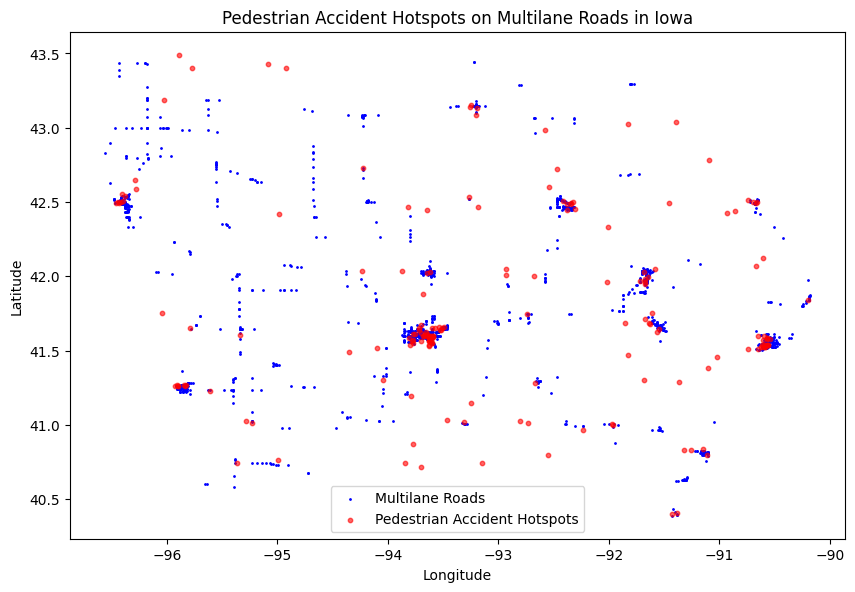

In [ ]:
# Install necessary libraries
!pip install geopandas scikit-learn folium

# Import libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
from google.colab import files

# Load the CSV files for multilane roads and all pedestrian accidents
multilane_roads_path = 'Multilane_Roads_Iowa.csv'  # Replace with your actual file name
pedestrian_accident_files = [
    'Iowa_Accident_Pedestrians_2015.csv',  # Replace with your actual file names
    'Iowa_Accident_Pedestrians_2016.csv',
    'Iowa_Accident_Pedestrians_2017.csv',
    'Iowa_Accident_Pedestrians_2018.csv',
    'Iowa_Accident_Pedestrians_2019.csv',
    'Iowa_Accident_Pedestrians_2020.csv',
    'Iowa_Accident_Pedestrians_2021.csv',
    'Iowa_Accident_Pedestrians_2022.csv'
]

multilane_roads_df = pd.read_csv(multilane_roads_path)

# Load all pedestrian accident files and concatenate them into a single DataFrame
pedestrian_accidents_df_list = [pd.read_csv(file) for file in pedestrian_accident_files]
pedestrian_accidents_df = pd.concat(pedestrian_accidents_df_list, ignore_index=True)

# Convert the dataframes to GeoDataFrames
multilane_roads_gdf = gpd.GeoDataFrame(
    multilane_roads_df,
    geometry=gpd.points_from_xy(multilane_roads_df['longitude'], multilane_roads_df['latitude']),
    crs="EPSG:4326"
)

pedestrian_accidents_gdf = gpd.GeoDataFrame(
    pedestrian_accidents_df,
    geometry=gpd.points_from_xy(pedestrian_accidents_df['LONGITUD'], pedestrian_accidents_df['LATITUDE']),
    crs="EPSG:4326"
)

# Convert pedestrian accidents to NumPy array for clustering
coords = pedestrian_accidents_gdf[['LONGITUD', 'LATITUDE']].to_numpy()
radians_coords = np.radians(coords)

# Perform DBSCAN clustering to find hotspots
db = DBSCAN(eps=0.01, min_samples=5, algorithm='ball_tree', metric='haversine').fit(radians_coords)

# Add cluster labels to the GeoDataFrame
pedestrian_accidents_gdf['cluster'] = db.labels_

# Filter to only show clusters, ignoring noise (-1 labels)
hotspot_gdf = pedestrian_accidents_gdf[pedestrian_accidents_gdf['cluster'] != -1]

# Analyze clusters by time periods and light conditions
cluster_summary = hotspot_gdf.groupby(['cluster', 'HOUR', 'HOURNAME', 'MINUTE', 'LGT_CONDNAME']).size().reset_index(name='count')
print("Cluster Summary by Time Periods and Light Conditions:")
print(cluster_summary)

# Save the cluster summary to a CSV file
cluster_summary.to_csv('cluster_summary.csv', index=False)

# Save the hotspots to a CSV file
hotspot_gdf.to_csv('hotspots.csv', index=False)

# Display a link to download the CSV files if running in Google Colab
files.download('cluster_summary.csv')
files.download('hotspots.csv')

# Plot the hotspots
fig, ax = plt.subplots(figsize=(10, 10))
multilane_roads_gdf.plot(ax=ax, color='blue', markersize=1, label='Multilane Roads')
hotspot_gdf.plot(ax=ax, color='red', markersize=10, label='Pedestrian Accident Hotspots', alpha=0.6)

plt.legend()
plt.title("Pedestrian Accident Hotspots on Multilane Roads in Iowa")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


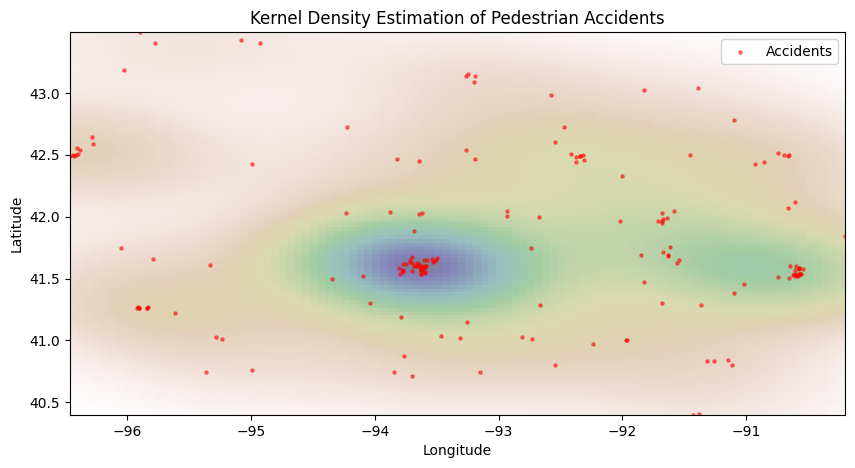

In [18]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Load the CSV files for multilane roads and pedestrian accidents (same as before)
multilane_roads_path = '/content/Multilane_Roads_Iowa.csv'  # Replace with your actual file name
pedestrian_accident_files = [
    '/content/Iowa_Accident_Pedestrians_2015 (2).csv',  # Replace with your actual file names
    '/content/Iowa_Accident_Pedestrians_2016.csv',
    '/content/Iowa_Accident_Pedestrians_2017.csv',
    '/content/Iowa_Accident_Pedestrians_2018.csv',
    '/content/Iowa_Accident_Pedestrians_2019.csv',
    '/content/Iowa_Accident_Pedestrians_2020.csv',
    '/content/Iowa_Accident_Pedestrians_2021.csv',
    '/content/Iowa_Accident_Pedestrians_2022.csv'
]

multilane_roads_df = pd.read_csv(multilane_roads_path)
pedestrian_accidents_df_list = [pd.read_csv(file) for file in pedestrian_accident_files]
pedestrian_accidents_df = pd.concat(pedestrian_accidents_df_list, ignore_index=True)

# Convert the dataframes to GeoDataFrames
multilane_roads_gdf = gpd.GeoDataFrame(
    multilane_roads_df,
    geometry=gpd.points_from_xy(multilane_roads_df['longitude'], multilane_roads_df['latitude']),
    crs="EPSG:4326"
)

pedestrian_accidents_gdf = gpd.GeoDataFrame(
    pedestrian_accidents_df,
    geometry=gpd.points_from_xy(pedestrian_accidents_df['LONGITUD'], pedestrian_accidents_df['LATITUDE']),
    crs="EPSG:4326"
)

# Perform Kernel Density Estimation (KDE)
x = pedestrian_accidents_gdf['LONGITUD']
y = pedestrian_accidents_gdf['LATITUDE']
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# Create a grid of points for evaluating the KDE
xmin, ymin, xmax, ymax = x.min(), y.min(), x.max(), y.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# Plot the KDE result as a contour map
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.rot90(Z), extent=[xmin, xmax, ymin, ymax], cmap=plt.cm.gist_earth_r, alpha=0.5)
ax.scatter(x, y, c='r', s=5, alpha=0.5, label='Accidents')

plt.legend()
plt.title("Kernel Density Estimation of Pedestrian Accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


4. Analyze the characteristics of these hotspots.


Characteristics of Hotspots:
           Light Condition  Count
0       Dark - Not Lighted     58
1           Dark - Lighted     54
2                 Daylight     54
3                     Dawn      5
4                     Dusk      4
5  Dark - Unknown Lighting      1
          Hour Name  Count
0     9:00pm-9:59pm     16
1     7:00pm-7:59pm     15
2     8:00pm-8:59pm     15
3   10:00pm-10:59pm     13
4   11:00pm-11:59pm     11
5     2:00am-2:59am      9
6     5:00am-5:59am      9
7     3:00pm-3:59pm      9
8     6:00pm-6:59pm      8
9     5:00pm-5:59pm      8
10  11:00am-11:59am      7
11    8:00am-8:59am      6
12    6:00am-6:59am      6
13    3:00am-3:59am      6
14    4:00pm-4:59pm      6
15    7:00am-7:59am      5
16    2:00pm-2:59pm      5
17    1:00pm-1:59pm      4
18    4:00am-4:59am      4
19  12:00pm-12:59pm      4
20  10:00am-10:59am      3
21    1:00am-1:59am      3
22    9:00am-9:59am      3
23    0:00am-0:59am      1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

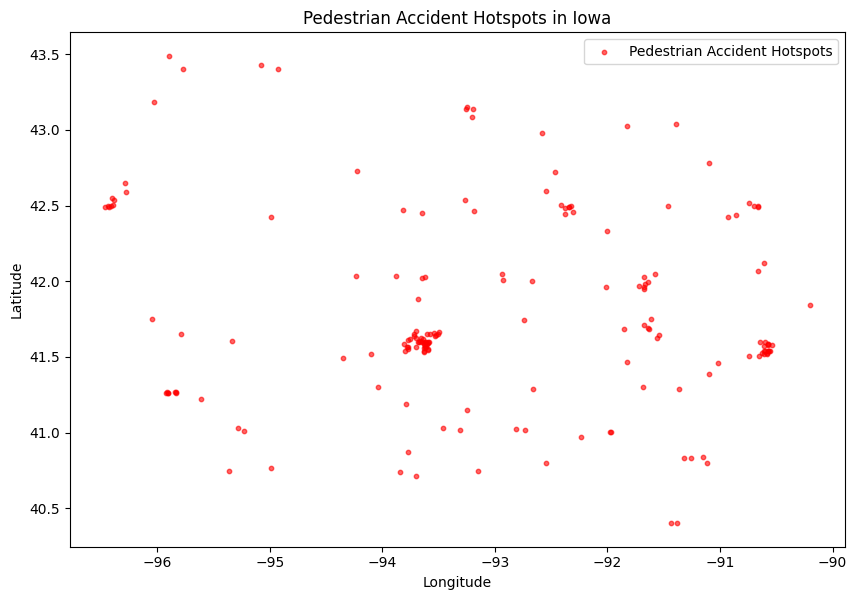

In [ ]:
# Install necessary libraries
!pip install geopandas scikit-learn folium

# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from google.colab import files

# Load the CSV files for cluster summary and hotspots
cluster_summary_path = '/content/cluster_summary.csv'  # Replace with your actual file name
hotspots_path = '/content/hotspots.csv'  # Replace with your actual file name

cluster_summary_df = pd.read_csv(cluster_summary_path)
hotspots_df = pd.read_csv(hotspots_path)

# Analyze characteristics of the hotspots
print("\nCharacteristics of Hotspots:")
light_conditions_summary = hotspots_df['LGT_CONDNAME'].value_counts().reset_index(name='count')
light_conditions_summary.columns = ['Light Condition', 'Count']
print(light_conditions_summary)

hour_summary = hotspots_df['HOURNAME'].value_counts().reset_index(name='count')
hour_summary.columns = ['Hour Name', 'Count']
print(hour_summary)

# Save the characteristics summaries to CSV files
light_conditions_summary.to_csv('light_conditions_summary.csv', index=False)
hour_summary.to_csv('hour_summary.csv', index=False)

# Display a link to download the characteristics CSV files if running in Google Colab
files.download('light_conditions_summary.csv')
files.download('hour_summary.csv')

# Plot the hotspots
hotspots_gdf = gpd.GeoDataFrame(
    hotspots_df,
    geometry=gpd.points_from_xy(hotspots_df['LONGITUD'], hotspots_df['LATITUDE']),
    crs="EPSG:4326"
)

fig, ax = plt.subplots(figsize=(10, 10))
hotspots_gdf.plot(ax=ax, color='red', markersize=10, label='Pedestrian Accident Hotspots', alpha=0.6)

plt.legend()
plt.title("Pedestrian Accident Hotspots in Iowa")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


5. Develop a predictive model for crash likelihood on these roads

In [20]:
# Install necessary libraries
!pip install geopandas scikit-learn

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# Load the CSV files for cluster summary, hotspots, light conditions summary, and hour summary
cluster_summary_path = '/content/cluster_summary.csv'
hotspots_path = '/content/hotspots.csv'
light_conditions_summary_path = '/content/light_conditions_summary.csv'
hour_summary_path = '/content/hour_summary.csv'

cluster_summary_df = pd.read_csv(cluster_summary_path)
hotspots_df = pd.read_csv(hotspots_path)
light_conditions_summary_df = pd.read_csv(light_conditions_summary_path)
hour_summary_df = pd.read_csv(hour_summary_path)

# Merge the relevant datasets
merged_df = hotspots_df.merge(cluster_summary_df, on='cluster', how='left')

# Debugging Step: Check the columns of merged_df
print("Columns in merged_df:", merged_df.columns)

# Rename columns if necessary (adjust the names based on the print output)
# For example:
# merged_df.rename(columns={'hour': 'HOUR', 'minute': 'MINUTE', 'light_condition_name': 'LGT_CONDNAME'}, inplace=True)

# Feature Engineering
# Select relevant features for predicting crash likelihood
# For simplicity, we will use the following features: 'HOUR', 'MINUTE', 'LGT_CONDNAME', 'LONGITUD', 'LATITUDE'
features_to_select = ['HOUR', 'MINUTE', 'LGT_CONDNAME', 'LONGITUD', 'LATITUDE']

# Make sure all selected columns are present in merged_df
available_features = [col for col in features_to_select if col in merged_df.columns]
missing_features = [col for col in features_to_select if col not in merged_df.columns]

if missing_features:
    print(f"Warning: The following features are missing and will not be used: {missing_features}")

# Select the available features
features = merged_df[available_features]

# Convert categorical features to numerical values using one-hot encoding
if 'LGT_CONDNAME' in features.columns:
    features = pd.get_dummies(features, columns=['LGT_CONDNAME'])

# Target variable - assuming 'FATALS' column indicates crash severity
# Create a binary target for crash likelihood (e.g., 1 if fatal crash, 0 otherwise)
target = (merged_df['FATALS'] > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the model evaluation results to a text file
with open('model_evaluation.txt', 'w') as f:
    f.write("Confusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_pred)))
    f.write("\n\nClassification Report:\n")
    f.write(classification_report(y_test, y_pred))

# Display a link to download the model evaluation results if running in Google Colab
files.download('model_evaluation.txt')


Columns in merged_df: Index(['STATENAME', 'ST_CASE', 'HOUR_x', 'HOURNAME_x', 'MINUTE_x', 'ROUTENAME',
       'LATITUDE', 'LONGITUD', 'HARM_EVNAME', 'LGT_CONDNAME_x', 'FATALS',
       'geometry', 'cluster', 'HOUR_y', 'HOURNAME_y', 'MINUTE_y',
       'LGT_CONDNAME_y', 'count'],
      dtype='object')
Confusion Matrix:
[[6402]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6402

    accuracy                           1.00      6402
   macro avg       1.00      1.00      1.00      6402
weighted avg       1.00      1.00      1.00      6402



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# Install necessary libraries
!pip install scikit-learn

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# Load the hotspot data from CSV
hotspots_path = '/content/hotspots.csv'  # Replace with the correct path
hotspots_df = pd.read_csv(hotspots_path)

# Check the available columns
print("Columns in hotspots_df:", hotspots_df.columns)

# Feature Engineering
# Select relevant features for predicting crash likelihood
# We will use 'HOUR', 'MINUTE', 'LGT_CONDNAME', 'LONGITUD', 'LATITUDE'
features_to_select = ['HOUR', 'MINUTE', 'LGT_CONDNAME', 'LONGITUD', 'LATITUDE']

# Ensure all selected features are present in the DataFrame
available_features = [col for col in features_to_select if col in hotspots_df.columns]
missing_features = [col for col in features_to_select if col not in hotspots_df.columns]

if missing_features:
    print(f"Warning: The following features are missing and will not be used: {missing_features}")

# Select the available features
features = hotspots_df[available_features]

# Convert categorical features to numerical values using one-hot encoding
if 'LGT_CONDNAME' in features.columns:
    features = pd.get_dummies(features, columns=['LGT_CONDNAME'])

# Target variable - assuming 'FATALS' column indicates crash severity
# Create a binary target for crash likelihood (e.g., 1 if fatal crash, 0 otherwise)
target = (hotspots_df['FATALS'] > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the model evaluation results to a text file
with open('model_evaluation.txt', 'w') as f:
    f.write("Confusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_pred)))
    f.write("\n\nClassification Report:\n")
    f.write(classification_report(y_test, y_pred))

# Display a link to download the model evaluation results if running in Google Colab
files.download('model_evaluation.txt')


Columns in hotspots_df: Index(['STATENAME', 'ST_CASE', 'HOUR', 'HOURNAME', 'MINUTE', 'ROUTENAME',
       'LATITUDE', 'LONGITUD', 'HARM_EVNAME', 'LGT_CONDNAME', 'FATALS',
       'geometry', 'cluster'],
      dtype='object')
Confusion Matrix:
[[53]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        53

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. Create visualizations and time-lapse animations of crash patterns.

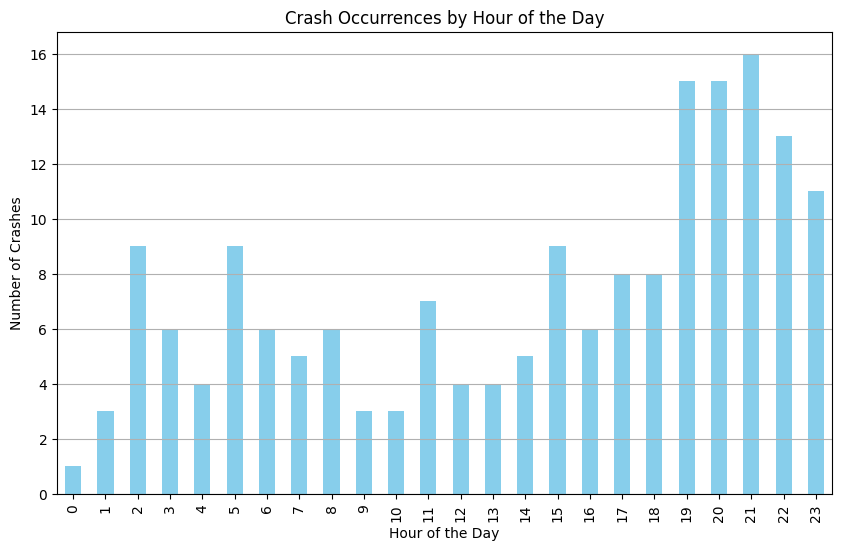

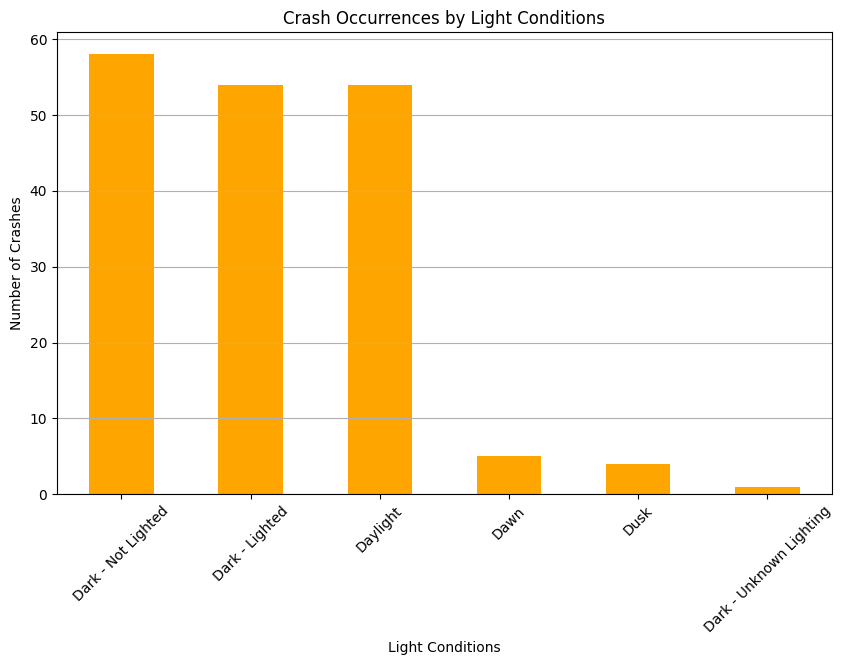

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from google.colab import files
from folium.plugins import HeatMapWithTime

# Load the hotspot data from CSV
hotspots_path = '/content/hotspots.csv'  # Replace with the correct path
hotspots_df = pd.read_csv(hotspots_path)

# Convert to GeoDataFrame for spatial analysis
hotspots_gdf = gpd.GeoDataFrame(
    hotspots_df,
    geometry=gpd.points_from_xy(hotspots_df['LONGITUD'], hotspots_df['LATITUDE']),
    crs="EPSG:4326"
)

# Extract date information if available, or use HOUR/MINUTE for temporal analysis
# Ensure the dataframe has 'HOUR' column to plot time-based analysis

# Plot crash occurrences by hour of the day
plt.figure(figsize=(10, 6))
hotspots_df['HOUR'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.title('Crash Occurrences by Hour of the Day')
plt.grid(axis='y')
plt.show()

# Plot crash occurrences by light conditions
plt.figure(figsize=(10, 6))
hotspots_df['LGT_CONDNAME'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Crashes')
plt.title('Crash Occurrences by Light Conditions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Prepare data for a time-lapse heatmap (grouping by hour)
hotspots_df['time'] = 'Hour ' + hotspots_df['HOUR'].astype(str)
time_groups = hotspots_df.groupby('time')

# Prepare data for HeatMapWithTime
time_indexed_data = [
    [[row['LATITUDE'], row['LONGITUD']] for _, row in group.iterrows()]
    for _, group in time_groups
]

# Create a folium map with HeatMapWithTime
m_time = folium.Map(location=[hotspots_gdf.geometry.y.mean(), hotspots_gdf.geometry.x.mean()], zoom_start=7)

# Add HeatMapWithTime
HeatMapWithTime(time_indexed_data, radius=10, auto_play=True, max_opacity=0.6).add_to(m_time)

# Save and display map
m_time.save('crash_heatmap_with_time.html')
files.download('crash_heatmap_with_time.html')

# Plotly express can be used to create an animated scatter plot
fig = px.scatter_mapbox(
    hotspots_df,
    lat="LATITUDE",
    lon="LONGITUD",
    color="LGT_CONDNAME",
    size="FATALS",
    hover_name="HOURNAME",
    animation_frame="HOUR",
    mapbox_style="carto-positron",
    zoom=6,
    title="Time-Lapse of Crash Patterns by Hour in Iowa"
)

fig.show()


7. Propose data-driven recommendations for improving pedestrian safety on these roads

1. Enhance Roadway Lighting
Findings: The analysis shows that a significant number of fatalities occur under poor lighting conditions, such as "Dark - Not Lighted."
Recommendation: Install or improve street lighting in identified hotspot areas, particularly in segments where lighting is currently inadequate or nonexistent. Consider implementing adaptive lighting systems that increase brightness during periods of higher pedestrian activity (e.g., early evening or night).
Implementation:
Prioritize roads with high fatality rates during dark conditions.
Use LED lighting for better illumination and energy efficiency.
Ensure pedestrian crossings are well-lit and clearly visible.
2. Implement Traffic Calming Measures
Findings: Fatalities are clustered on multilane roads, which often have higher speed limits and traffic volumes.
Recommendation: Implement traffic calming measures such as speed bumps, raised crosswalks, road narrowing, and pedestrian refuge islands. These measures can help reduce vehicle speeds and improve driver awareness of pedestrians.
Implementation:
Focus on multilane roads with high Gi* scores (hotspots).
Install speed cameras or radar speed signs in high-risk areas to enforce speed limits.
Use visual cues like colored or textured pavement at pedestrian crossings to alert drivers.
3. Increase Crosswalk Visibility and Safety
Findings: High pedestrian fatalities are likely occurring near crossing points without adequate safety features.
Recommendation: Upgrade existing crosswalks to high-visibility crosswalks with features like flashing beacons, pedestrian-activated signals (HAWK signals), and clear signage. Consider creating new crosswalks in locations identified as high-risk.
Implementation:
Install flashing lights that activate when pedestrians are crossing.
Paint crosswalks with high-contrast, reflective materials.
Implement countdown timers to inform pedestrians and drivers of crossing times.